In [1]:
import json
import pandas as pd

data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

# data_file = '../data/seeds_dataset.txt'
data_cols = ['area', 'perimeter','compactness','length','width','asym','groove', 'variety']

data = pd.read_csv(data_url, sep = '\t', error_bad_lines=False, names = data_cols, index_col=None)
data

C:\Users\zacha\AppData\Local\Temp\ipykernel_15348\2966850332.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(data_url, sep = '\t', error_bad_lines=False, names = data_cols, index_col=None)
b'Skipping line 8: expected 8 fields, saw 10\nSkipping line 36: expected 8 fields, saw 10\nSkipping line 61: expected 8 fields, saw 9\nSkipping line 69: expected 8 fields, saw 9\nSkipping line 107: expected 8 fields, saw 9\nSkipping line 136: expected 8 fields, saw 9\nSkipping line 170: expected 8 fields, saw 9\nSkipping line 171: expected 8 fields, saw 9\nSkipping line 173: expected 8 fields, saw 9\nSkipping line 202: expected 8 fields, saw 9\nSkipping line 204: expected 8 fields, saw 9\n'


,area,perimeter,compactness,length,width,asym,groove,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


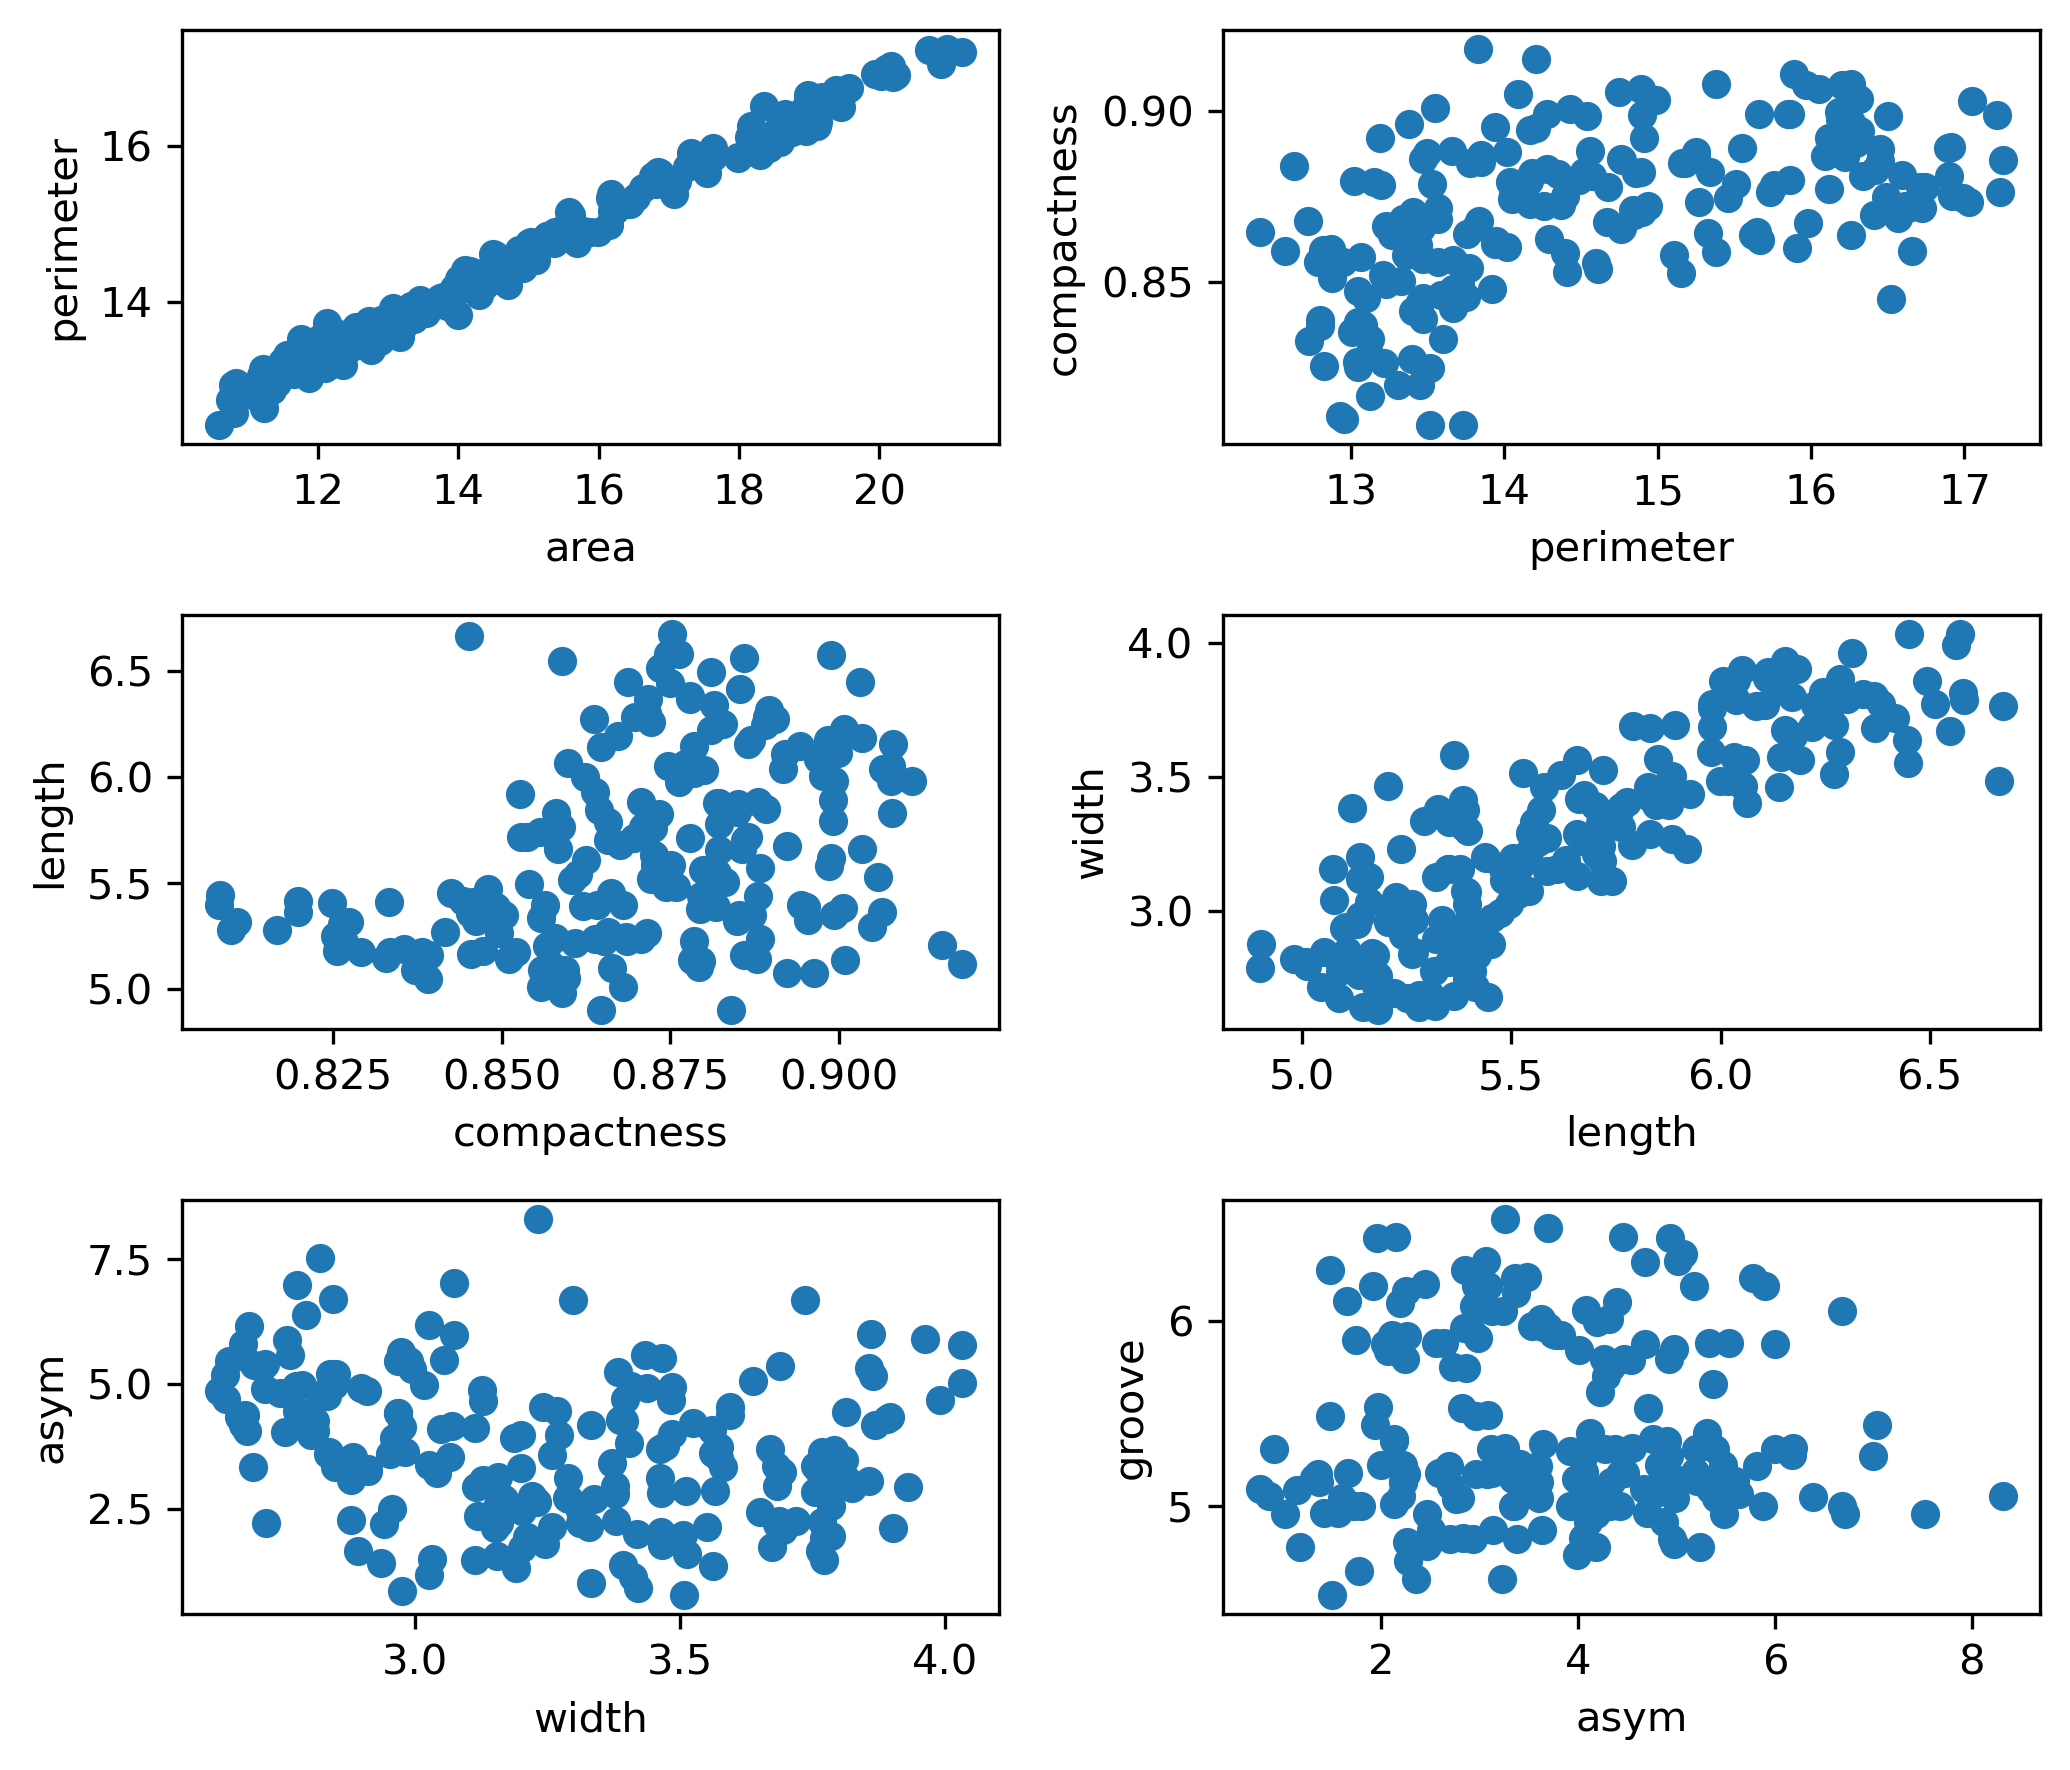

In [4]:
# take a quick look at the data
import matplotlib.pyplot as plt

nrows, ncols = 3,2

fig = plt.figure(figsize = (7,6), dpi =300)

for i in range (1,7):
    ax=fig.add_subplot(nrows, ncols, i)
    ax.scatter(data.iloc[:,i-1], data.iloc[:,i])
    ax.set_xlabel(data.columns[i-1])
    ax.set_ylabel(data.columns[i])
    
plt.tight_layout()
plt.show()

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


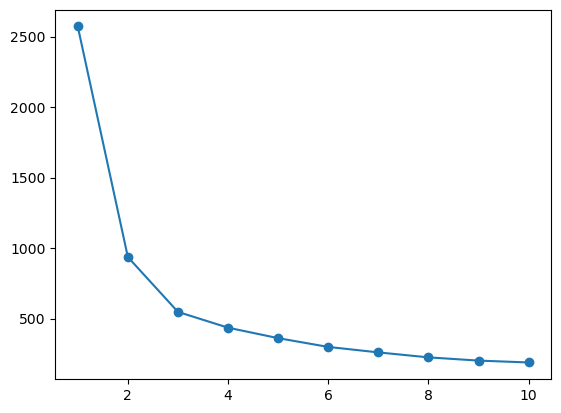

In [11]:
from sklearn.cluster import KMeans

inertias = []
ks = range(1,11)

for k in ks: 
    model = KMeans(n_clusters = k)
    
    model.fit(data.iloc[:,0:7])
    inertias.append(model.inertia_)
    
plt.plot(ks,inertias,'-o')
plt.show()

In [12]:
model = KMeans(n_clusters = 3)
model.fit(data.iloc[:,:7]) 

centroids = model.cluster_centers_
print(centroids.shape)

(3, 7)


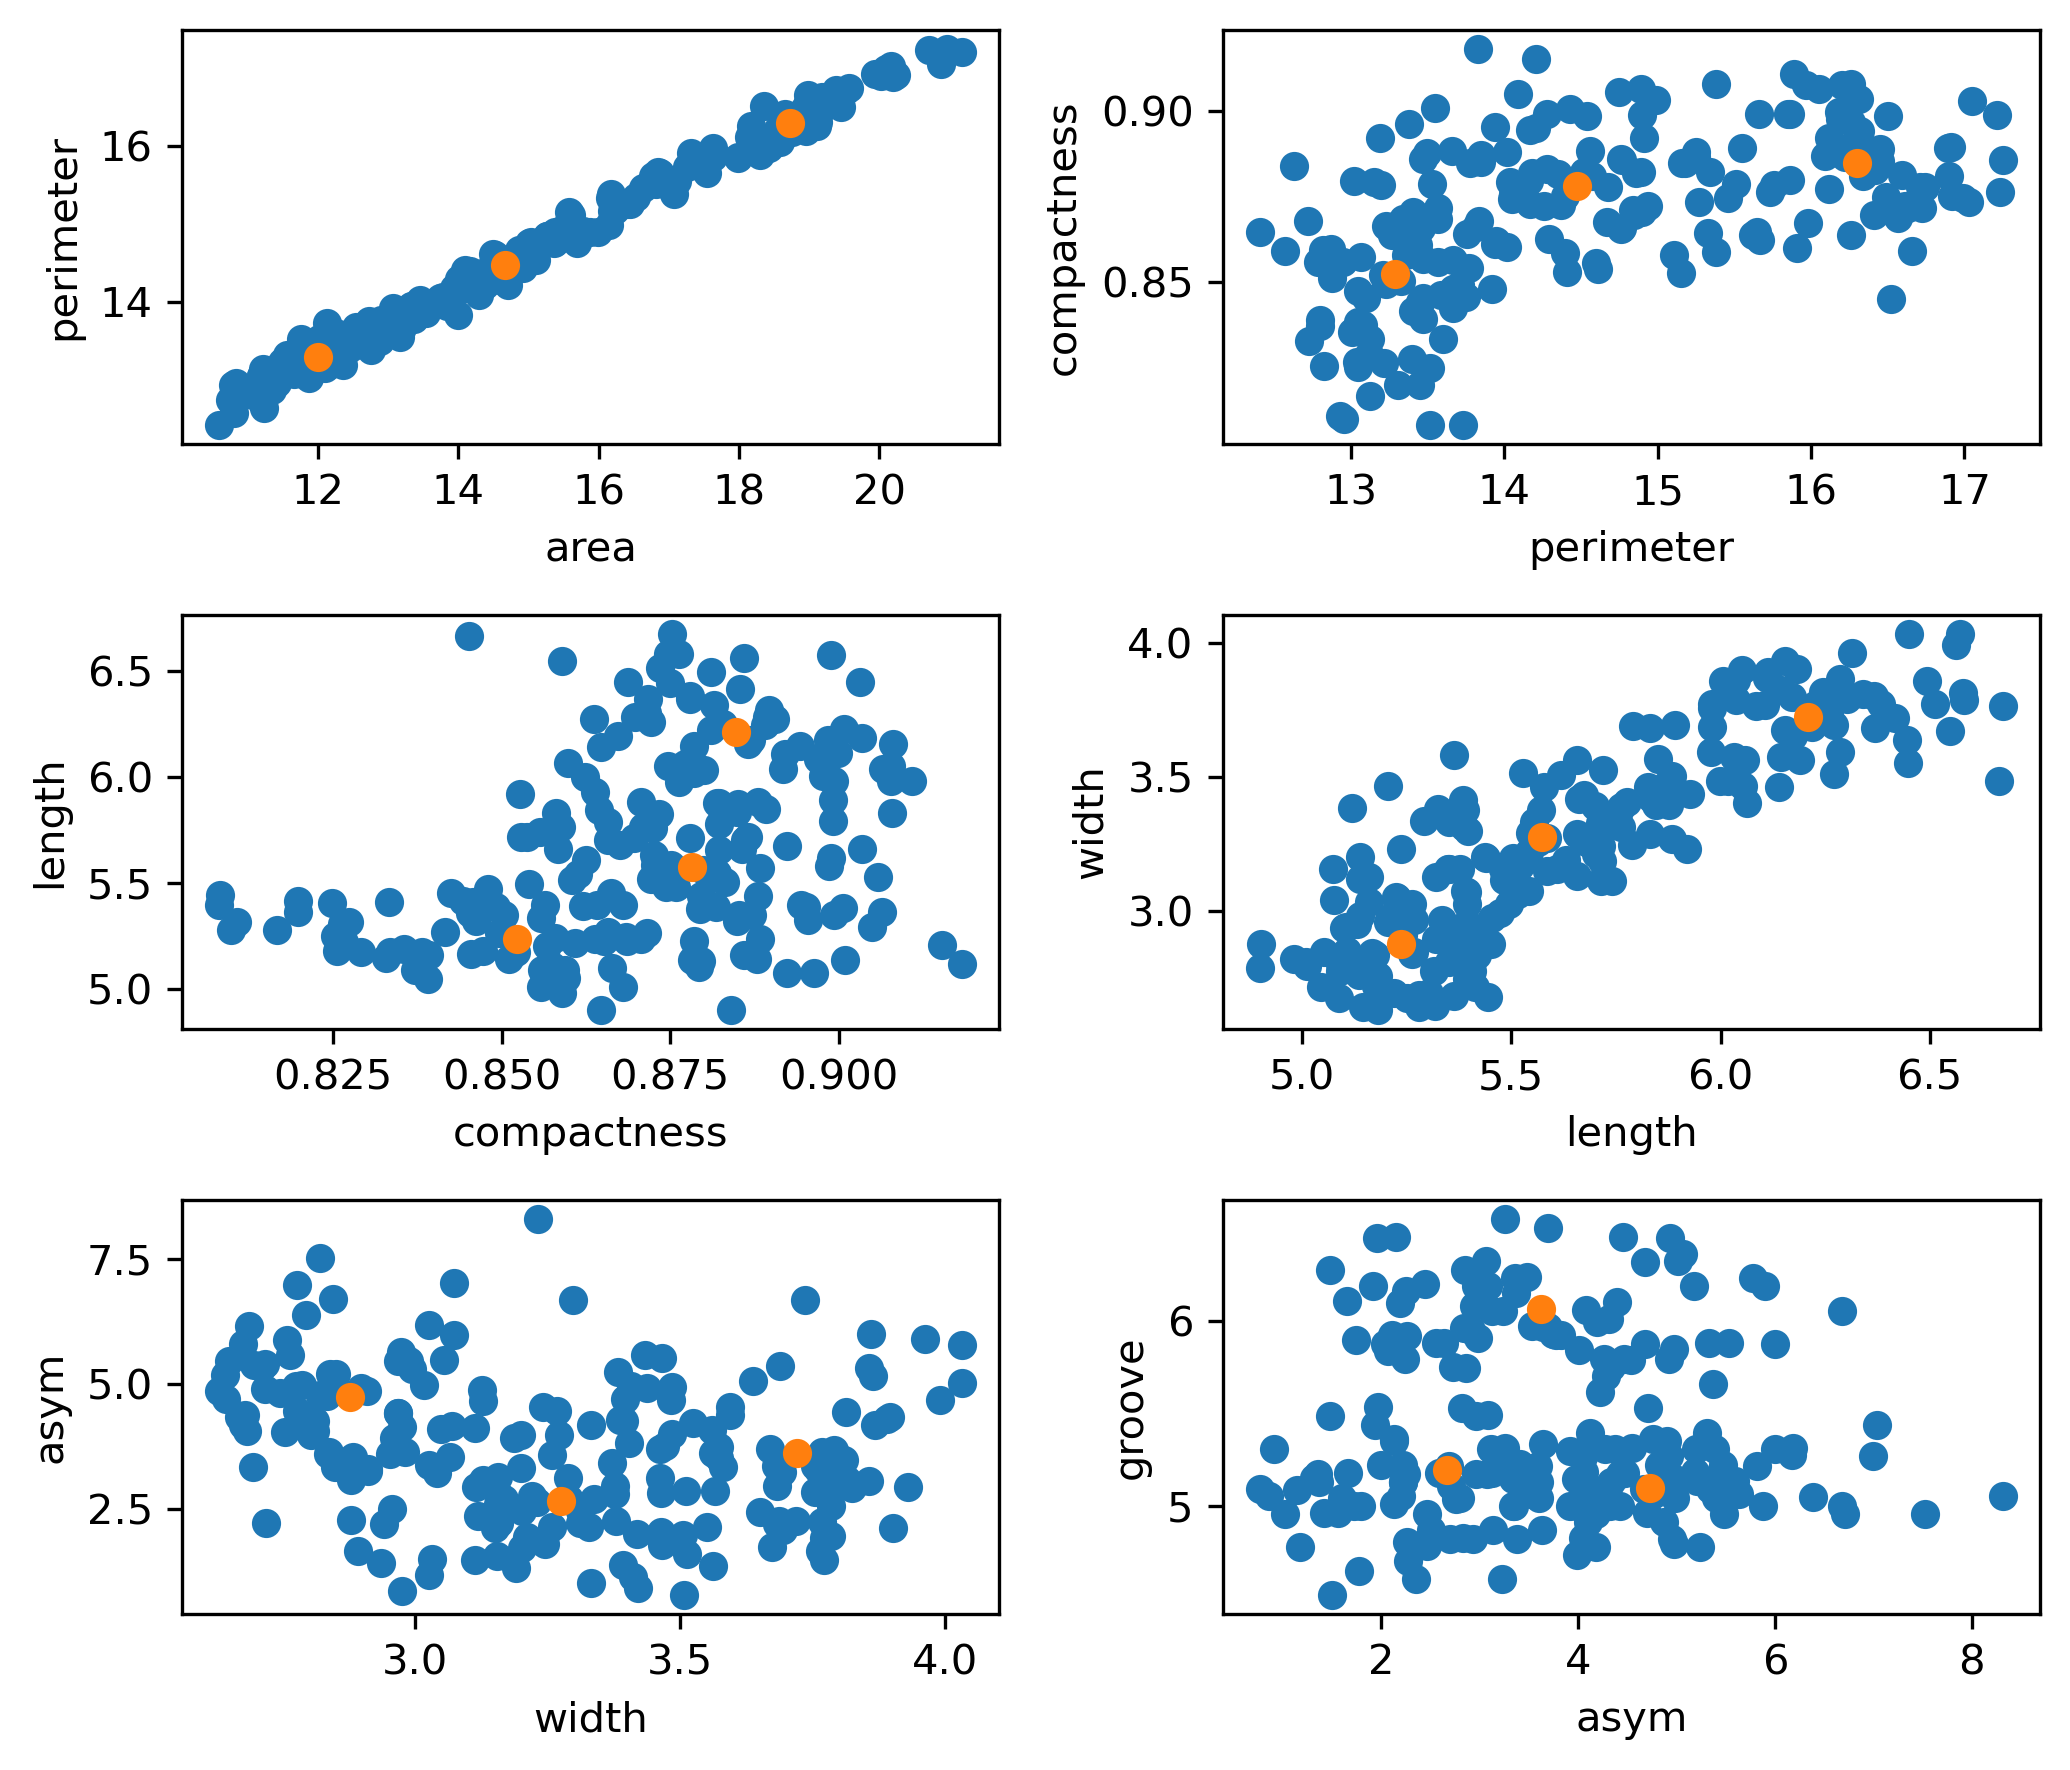

In [17]:
nrows, ncols = 3, 2
fig = plt.figure(figsize = (7,6), dpi = 300)

for i in range(1, 7):
    ax = fig.add_subplot(nrows, ncols, i)
    ax.scatter(data.iloc[:,i-1], data.iloc[:,i])
    ax.scatter(centroids[:,i-1], centroids[:,i])
    ax.set_xlabel(data.columns[i-1])
    ax.set_ylabel(data.columns[i])

plt.tight_layout()
plt.show()

In [18]:
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(data)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': data.variety})

# Create a cross-tabulation of the original variety from the seeds data table and the model prediction
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties   1   2   3
labels               
0          61   9   0
1           4   0  65
2           1  59   0
